In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import random

In [2]:
x = random.rand()   # use the built in random number generator from uniform

print(x)


0.17512040098378678


In [3]:
# the next function generates samples frm the bernoulli distribution

def binomial_rv(u,d,p):
    x = random.rand()
    if x<p:
        z=u
    else:
        z=d
    return z

(array([474.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 526.]),
 array([0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05]),
 <BarContainer object of 10 artists>)

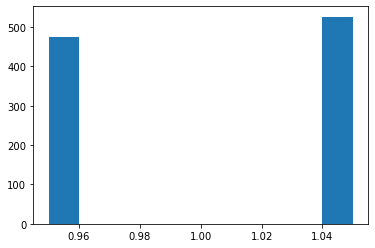

In [6]:
u=1.05
d=0.95
p=0.5

N=1000

h=np.zeros((N))   # initiate a  vector of zeros
for i in range(N):
    h[i]=binomial_rv(u,d,p)
    

plt.hist(h)                       # histogram of returns


In [7]:
# generate single path from binomial model

def binomial_model_path(S_0,u,d,p,T):
    S=np.zeros((T))
    S[0]=S_0
    for i in range(1,T):
        S[i]=S[i-1]*binomial_rv(u,d,p)
    return S    

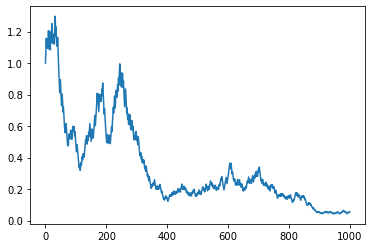

In [8]:
T=1000
S_0=1.
S_path=binomial_model_path(S_0,u,d,p,T)

plt.plot(S_path)


In [9]:
# generate multiple paths from the binomial model

def binomial_model_paths(S_0,u,d,p,T,M):
    S_mult=np.zeros((M,T))
    for i in range(M):
        S_mult[i,:]=binomial_model_path(S_0,u,d,p,T)   # set i-th line 
    return S_mult

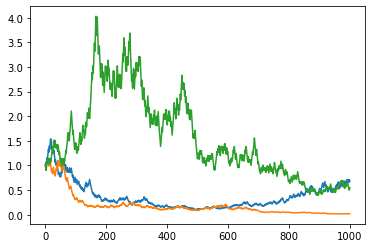

In [10]:
M=10
S_paths=binomial_model_paths(S_0,u,d,p,T,M)

plt.plot(S_paths[0,:])   # the first path
plt.plot(S_paths[1,:])  # the second path
plt.plot(S_paths[2,:])  # the third path


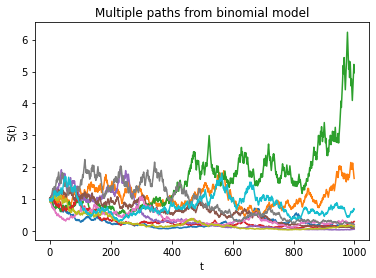

In [35]:
# if you run each of the above individually you get single graphs
# if you run all 3 as a block you get one plot with all 3 graphs


# or if you want to put all graphs 

for i in range(M):
    plt.plot(S_paths[i,:])   # plot the path i
    plt.xlabel('t')   
    plt.ylabel('S(t)')
    plt.title('Multiple paths from binomial model')

(array([   8.,   80.,  366.,  819., 1215., 1211.,  835.,  347.,  109.,
          10.]),
 array([-0.46163965, -0.37156454, -0.28148942, -0.19141431, -0.1013392 ,
        -0.01126409,  0.07881103,  0.16888614,  0.25896125,  0.34903636,
         0.43911148]),
 <BarContainer object of 10 artists>)

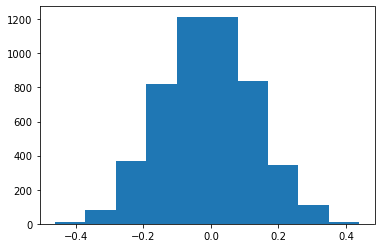

In [39]:
M=5000
S_paths=binomial_model_paths(S_0,u,d,p,T,M)


#plt.hist(S_paths[:,99])  # histogram of a sample of observ. for  S(100)

plt.hist(np.log(S_paths[:,9]))  # histogram of a sample of observ. for ln S(100)
                                  # close to normal


In [40]:
M=5
S_paths=binomial_model_paths(10,u,d,p,3,M)

In [41]:
S_paths

array([[10.   , 10.5  ,  9.975],
       [10.   , 10.5  , 11.025],
       [10.   ,  9.5  ,  9.025],
       [10.   , 10.5  ,  9.975],
       [10.   ,  9.5  ,  9.025]])

In [11]:
def pricing(S_0,K,T,r,u,d,M):
    p=(1+r-d)/(u-d)       # risk neutral measure
    S_paths=binomial_model_paths(S_0,u,d,p,T,M)
    Option_Value=np.zeros(M)
    
    for k in range(M):
        if S_paths[k,T-1]>K:
            Option_Value[k]=S_paths[k,T-1]-K
    
    Option_Price=(1+r)**(-(T-1))*Option_Value.mean()
    
    return Option_Price
    

In [14]:
pricing(10,9.8,3,0,1.05,0.95,100)

0.41474999999999945

(array([ 3.,  4., 10., 14., 24., 23., 12.,  3.,  4.,  3.]),
 array([0.35245, 0.36106, 0.36967, 0.37828, 0.38689, 0.3955 , 0.40411,
        0.41272, 0.42133, 0.42994, 0.43855]),
 <BarContainer object of 10 artists>)

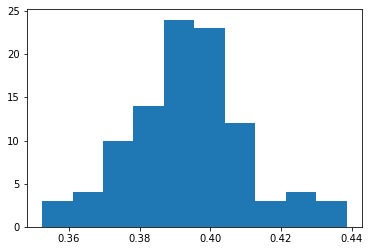

In [15]:
Value_Sample=np.zeros(100)
for i in range(100):
    Value_Sample[i]=pricing(10,9.8,3,0,1.05,0.95,1000)

plt.hist(Value_Sample)

In [16]:
Value_Sample.mean()

0.39384799999999937

In [17]:
Value_Sample.var()

0.0002783912460000002